<h1 style="color: purple; font-family: Arial, sans-serif; font-size: 36px; text-align: center; text-decoration: underline;">
    Midterm Assignment
</h1>


In [128]:
import numpy as np
import pandas as pd

from numerize import numerize as nz

from lets_plot import * 
LetsPlot.setup_html()

#### <span style="color: #2a9d8f;">Add code to read all the files into a single DataFrame, `df`, and to perform an initial preprocessing of the data (e.g., drop duplicates, rename columns, adequate data types etc.)</span>

In [129]:
import os


all_files = [os.path.join('../data/waitrose', file) for file in os.listdir('../data/waitrose') 
             if file.endswith('.csv')]

df = pd.concat((pd.read_csv(file) for file in all_files))

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 25418 entries, 0 to 1593
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data-product-id        25418 non-null  int64  
 1   data-product-name      25418 non-null  object 
 2   data-product-type      25418 non-null  object 
 3   data-product-on-offer  25418 non-null  bool   
 4   data-product-index     25408 non-null  float64
 5   image-url              25418 non-null  object 
 6   product-page           25418 non-null  object 
 7   product-name           25407 non-null  object 
 8   product-size           25363 non-null  object 
 9   item-price             25407 non-null  object 
 10  price-per-unit         24976 non-null  object 
 11  offer-description      7201 non-null   object 
 12  category               25418 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 2.5+ MB
None
   data-product-id                      

In [130]:

df = df.drop_duplicates()

df = df.drop(columns=['data-product-name', 
                      'data-product-type', 
                      'data-product-index'])
df = (
    df.rename(columns={
        'data-product-id': 'id',
        'data-product-on-offer': 'offer',
        'product-page': 'page',
        'product-name': 'name',
        'product-size': 'size',
    })
)
\
df['id'] = df['id'].astype('int32'
                           )

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 25378 entries, 0 to 1593
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 25378 non-null  int32 
 1   offer              25378 non-null  bool  
 2   image-url          25378 non-null  object
 3   page               25378 non-null  object
 4   name               25367 non-null  object
 5   size               25323 non-null  object
 6   item-price         25367 non-null  object
 7   price-per-unit     24936 non-null  object
 8   offer-description  7178 non-null   object
 9   category           25378 non-null  object
dtypes: bool(1), int32(1), object(8)
memory usage: 1.9+ MB
None


In [131]:
df

,id,offer,image-url,page,name,size,item-price,price-per-unit,offer-description,category
0,525635,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Raspberry & Apple Soft Oaty Bars,6x23g,£3.15,£2.29/100g,NaN,"Baby, Child & Parent"
1,557746,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Carrot Cake Oaty Bars,6x23g,£3.15,£2.29/100g,NaN,"Baby, Child & Parent"
2,32062,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/aptamil...,Aptamil 2 Follow On Milk,800g,£13.50,£16.88/kg,NaN,"Baby, Child & Parent"
3,767801,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Baby Wipes,80s,95p,1.2p each,NaN,"Baby, Child & Parent"
4,514054,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Apple Rice Cakes,40g,£1.60,£4/100g,NaN,"Baby, Child & Parent"
...,...,...,...,...,...,...,...,...,...,...
1589,18427,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/duchy-o...,Duchy Organic British Lamb Half Leg,Typical weight 0.94kg,£24.31 each est.,£26.00/kg,NaN,Waitrose Brands
1590,11606,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cooks-i...,Cooks' Ingredients Wok Oil,250ml,£2.40,96p/100ml,NaN,Waitrose Brands
1591,6903,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/no-1-ba...,No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...,350g,£10.00,£28.58/kg,NaN,Waitrose Brands
1592,6125,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cooks-i...,Cooks' Ingredients White Marzipan,500g,£2.50,£5/kg,NaN,Waitrose Brands


<h1 style="color: purple; font-family: Arial, sans-serif; font-size: 36px; text-align: center; text-decoration: underline;">
     TASK 01 – DATA CLEANING
</h1>

---


### Problem Statement:
There are still a lot of duplicates because many products appear in multiple categories. Revisit the pre-processing code so that each product appears only once in the `df` DataFrame, following these steps:

1. **Reduce the DataFrame**:
   - Ensure that each row represents a unique product.

2. **Add a New Column**:
   - Create a `categories` column that contains a list of all categories that the product appears in.

3. **Preserve Original Price**:
   - Keep the `item-price` column with the original price of the item.
   

---

### Additional Requirement:
- More than producing valid code, document your thought process and the steps you took to achieve this.

In [132]:
def clean_item_price(item_price: str):    

    if 'each est.' in item_price:
        item_price = item_price.replace('each est.','')
    if type(item_price) != str:
        pass
    elif '£' in item_price:
        item_price=item_price.replace('£','')
    elif 'p' in item_price:
        item_price = item_price.replace('p','')
        item_price='0.'+item_price

    if'-' in item_price:
        item_price=item_price.split('-')[0]
   
        
    return float(item_price)

In [133]:
df['item-price-fixed'] = df['item-price'].astype(str).apply(clean_item_price)
df['item-price-fixed']

0        3.15
1        3.15
2       13.50
3        0.95
4        1.60
        ...  
1589    24.31
1590     2.40
1591    10.00
1592     2.50
1593    21.49
Name: item-price-fixed, Length: 25378, dtype: float64

In [134]:
df['item-price']=df['item-price-fixed']
df.drop(columns=['item-price-fixed'],inplace=True)
df['offer-description'] = df['offer-description'].replace(np.nan, 'Not On Offer')
data= (
    df.groupby('id') 
    .agg({
        'name': 'first',               
        'size': 'first',                  
        'item-price': 'first',
        'price-per-unit': 'first',
        'offer-description': 'first',
        'offer': 'first',
        'category': lambda x: list(set(x)) 
    })
    .reset_index()
)
data = data.rename(columns={
    'id': 'id',
    'name': 'name',
    'size': 'size',
    'item-price': 'price',
    'price-per-unit': 'price-per-unit',
    'category': 'categories',
    'offer': 'offer',
    'offer-description': 'offer_description'
})


data = data[['id','name', 'price','price-per-unit','size', 'offer', 'offer_description','categories']]

print("DataFrame Information:")
data.info()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16055 non-null  int32  
 1   name               16054 non-null  object 
 2   price              16054 non-null  float64
 3   price-per-unit     15713 non-null  object 
 4   size               16028 non-null  object 
 5   offer              16055 non-null  bool   
 6   offer_description  16055 non-null  object 
 7   categories         16055 non-null  object 
dtypes: bool(1), float64(1), int32(1), object(5)
memory usage: 831.1+ KB



<h1 style="color: purple; font-family: Arial, sans-serif; font-size: 36px; text-align: center; text-decoration: underline;">
   Cleaned Data:
</h1>




In [135]:
data.head()

,id,name,price,price-per-unit,size,offer,offer_description,categories
0,1023,Taylors of Harrogate Yorkshire Gold 160 Bags,7.10,£1.42/100g,500g,False,Not On Offer,"[Tea, Coffee & Soft Drinks]"
1,1029,Nestlé Box Bowls Variety 6 Portion Pack,2.30,£1.10/100g,210g,False,Not On Offer,[Food Cupboard]
2,1048,Kellogg's Corn Flakes Breakfast Cereal Large Pack,2.75,41p/100g,670g,True,save 45p. Was £3.20,"[Dietary & Lifestyle, Food Cupboard]"
3,1051,Kellogg's Crunchy Nut Breakfast Cereal Large Pack,5.00,59.5p/100g,840g,False,Not On Offer,"[Dietary & Lifestyle, Food Cupboard]"
4,1052,Kellogg's Crunchy Nut Breakfast Cereal,2.75,59.8p/100g,460g,True,save 75p. Was £3.50,"[Dietary & Lifestyle, Food Cupboard]"


---


<h1 style="color: purple; font-family: Arial, sans-serif; font-size: 36px; text-align: center; text-decoration: underline;">
   TASK 02 – COMPARATIVE ANALYSIS:
</h1>




### Objective
From the plot in 🗓️ **Week 01 – Day 04**, we learned that the supermarket’s own brand ('Everyday Value') contains the cheapest products in the dataset. The goal is to create **at least two data visualizations** to analyze how the products in this category compare to their equivalent branded products in other categories within the dataset.

---

### Guidelines
This task is intentionally open-ended, allowing room for creativity. The focus is to:
1. Demonstrate **data wrangling skills** using Pandas.
2. Use **visualizations** to explore and compare the data effectively.

---


In [136]:
df['price-per-unit']

0       £2.29/100g
1       £2.29/100g
2        £16.88/kg
3        1.2p each
4          £4/100g
           ...    
1589     £26.00/kg
1590     96p/100ml
1591     £28.58/kg
1592         £5/kg
1593    £7.17/75cl
Name: price-per-unit, Length: 25378, dtype: object

In [137]:
def process_price(price):
   
    price_str = str(price).lower().strip()
    
 
    price_str = (
        price_str.replace('£', '')        
        .replace('p', '')             
        .replace('each', '')             
        .replace('per', '/')            
        .replace('/100 sheets', '')      
        .strip()
    )
    
  
    if '/100g' in price_str:
        price_str = price_str.replace('/100g', '').strip()
        return float(price_str) * 10 


    if '/100ml' in price_str:
        price_str = price_str.replace('/100ml', '').strip()
        return float(price_str) * 10  

  
    if '/kg' in price_str:
        price_str = price_str.replace('/kg', '').strip()
        return float(price_str)

  
    if '/liter' in price_str or '/litre' in price_str:
        price_str = price_str.replace('/liter', '').replace('/litre', '').strip()
        return float(price_str) 

   
    try:
        return float(price_str)
    except ValueError:
        return None  


df['price-per-kg'] = df['price-per-unit'].apply(process_price)


In [138]:

Everyday = df['category'].str.contains('Everyday Value', case=False)&df['name'].str.contains('Essential', case=False, na=False)
everyday_rows = df[Everyday]
Essential = everyday_rows.nsmallest(5, 'item-price')
Essential




,id,offer,image-url,page,name,size,item-price,price-per-unit,offer-description,category,price-per-kg
3,85115,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,0.15,£1/kg,Not On Offer,Everyday Value,1.00
8,85005,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Large White Potatoes,Typical weight 0.28kg,0.24,87p/kg,Not On Offer,Everyday Value,87.00
4,88411,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Lemons,Each,0.35,35p each,Not On Offer,Everyday Value,35.00
72,19525,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Kidney Beans in Water,drained 180g,0.50,£2.78/kg,Not On Offer,Everyday Value,2.78
99,6211,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Plain White Flour,500g,0.50,£1/kg,Not On Offer,Everyday Value,1.00


In [139]:
non_everyday = df[
    ~df['category'].str.contains('Everyday Value', case=False, na=False) &
    ~df['name'].str.contains('Essential', case=False, na=False)
]

Brand= non_everyday.nsmallest(5, 'item-price')
Brand

,id,offer,image-url,page,name,size,item-price,price-per-unit,offer-description,category,price-per-kg
613,36992,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/options...,Options Belgian Hot Chocolate Drink Sachet,11g,0.40,£3.64/100g,Not On Offer,"Tea, Coffee & Soft Drinks",36.4
329,700563,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cadbury...,Cadbury Hot Chocolate Instant Sachet,28g,0.45,£1.61/100g,Not On Offer,"Tea, Coffee & Soft Drinks",16.1
645,451249,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/horlick...,Horlicks Instant,32g,0.45,£1.41/100g,Not On Offer,"Tea, Coffee & Soft Drinks",14.1
88,59708,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rizla-c...,Rizla+ Cigarette Papers 50s,Each,0.49,49p each,Not On Offer,Home,49.0
140,398273,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rizla-t...,Rizla+ Thin Blue Quality Paper 50s,50s,0.49,1p each,Not On Offer,Home,1.0


In [140]:
plot_df = pd.concat([Essential, Brand])
plot_df = plot_df.reset_index(drop=True)
plot_df

,id,offer,image-url,page,name,size,item-price,price-per-unit,offer-description,category,price-per-kg
0,85115,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,0.15,£1/kg,Not On Offer,Everyday Value,1.00
1,85005,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Large White Potatoes,Typical weight 0.28kg,0.24,87p/kg,Not On Offer,Everyday Value,87.00
2,88411,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Lemons,Each,0.35,35p each,Not On Offer,Everyday Value,35.00
3,19525,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Kidney Beans in Water,drained 180g,0.50,£2.78/kg,Not On Offer,Everyday Value,2.78
4,6211,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Plain White Flour,500g,0.50,£1/kg,Not On Offer,Everyday Value,1.00
5,36992,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/options...,Options Belgian Hot Chocolate Drink Sachet,11g,0.40,£3.64/100g,Not On Offer,"Tea, Coffee & Soft Drinks",36.40
6,700563,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cadbury...,Cadbury Hot Chocolate Instant Sachet,28g,0.45,£1.61/100g,Not On Offer,"Tea, Coffee & Soft Drinks",16.10
7,451249,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/horlick...,Horlicks Instant,32g,0.45,£1.41/100g,Not On Offer,"Tea, Coffee & Soft Drinks",14.10
8,59708,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rizla-c...,Rizla+ Cigarette Papers 50s,Each,0.49,49p each,Not On Offer,Home,49.00
9,398273,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rizla-t...,Rizla+ Thin Blue Quality Paper 50s,50s,0.49,1p each,Not On Offer,Home,1.00


In [141]:
plot_df['is_essential'] = plot_df.apply(
    lambda row: 'Essential' if 'Everyday Value' in str(row['category']) and 'Essential' in str(row['name'])
    else 'Branded',
    axis=1
)

plot_df

,id,offer,image-url,page,name,size,item-price,price-per-unit,offer-description,category,price-per-kg,is_essential
0,85115,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Onions,Typical weight 0.15kg,0.15,£1/kg,Not On Offer,Everyday Value,1.00,Essential
1,85005,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Large White Potatoes,Typical weight 0.28kg,0.24,87p/kg,Not On Offer,Everyday Value,87.00,Essential
2,88411,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Lemons,Each,0.35,35p each,Not On Offer,Everyday Value,35.00,Essential
3,19525,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Red Kidney Beans in Water,drained 180g,0.50,£2.78/kg,Not On Offer,Everyday Value,2.78,Essential
4,6211,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Plain White Flour,500g,0.50,£1/kg,Not On Offer,Everyday Value,1.00,Essential
5,36992,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/options...,Options Belgian Hot Chocolate Drink Sachet,11g,0.40,£3.64/100g,Not On Offer,"Tea, Coffee & Soft Drinks",36.40,Branded
6,700563,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cadbury...,Cadbury Hot Chocolate Instant Sachet,28g,0.45,£1.61/100g,Not On Offer,"Tea, Coffee & Soft Drinks",16.10,Branded
7,451249,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/horlick...,Horlicks Instant,32g,0.45,£1.41/100g,Not On Offer,"Tea, Coffee & Soft Drinks",14.10,Branded
8,59708,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rizla-c...,Rizla+ Cigarette Papers 50s,Each,0.49,49p each,Not On Offer,Home,49.00,Branded
9,398273,False,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rizla-t...,Rizla+ Thin Blue Quality Paper 50s,50s,0.49,1p each,Not On Offer,Home,1.00,Branded


In [142]:
from plotnine import *

In [143]:
plot_df['name'] = pd.Categorical(plot_df['name'], categories=plot_df['name'], ordered=True)

plot = (ggplot(data=plot_df) +
    geom_line(aes(x='name', y='item-price', color='is_essential', group='is_essential'), size=2.5) +  
    geom_point(aes(x='name', y='item-price', color='is_essential'), size=5) +  
   
    ggtitle('Comparison of Price between Essentials and Branded Products') +
    xlab('Product Name') + 
    ylab('Price ($)') +
    theme_minimal() +
    theme(
        axis_text_x=element_text(angle=45, hjust=1)  
    ) +
    scale_y_continuous(breaks=[0.10, 0.20, 0.30, 0.40, 0.50]) 
)





<h1 style="color: purple; font-family: Arial, sans-serif; font-size: 36px; text-align: center; text-decoration: underline;">
   COMPARATIVE ANALYSIS: visualizations plot
</h1>




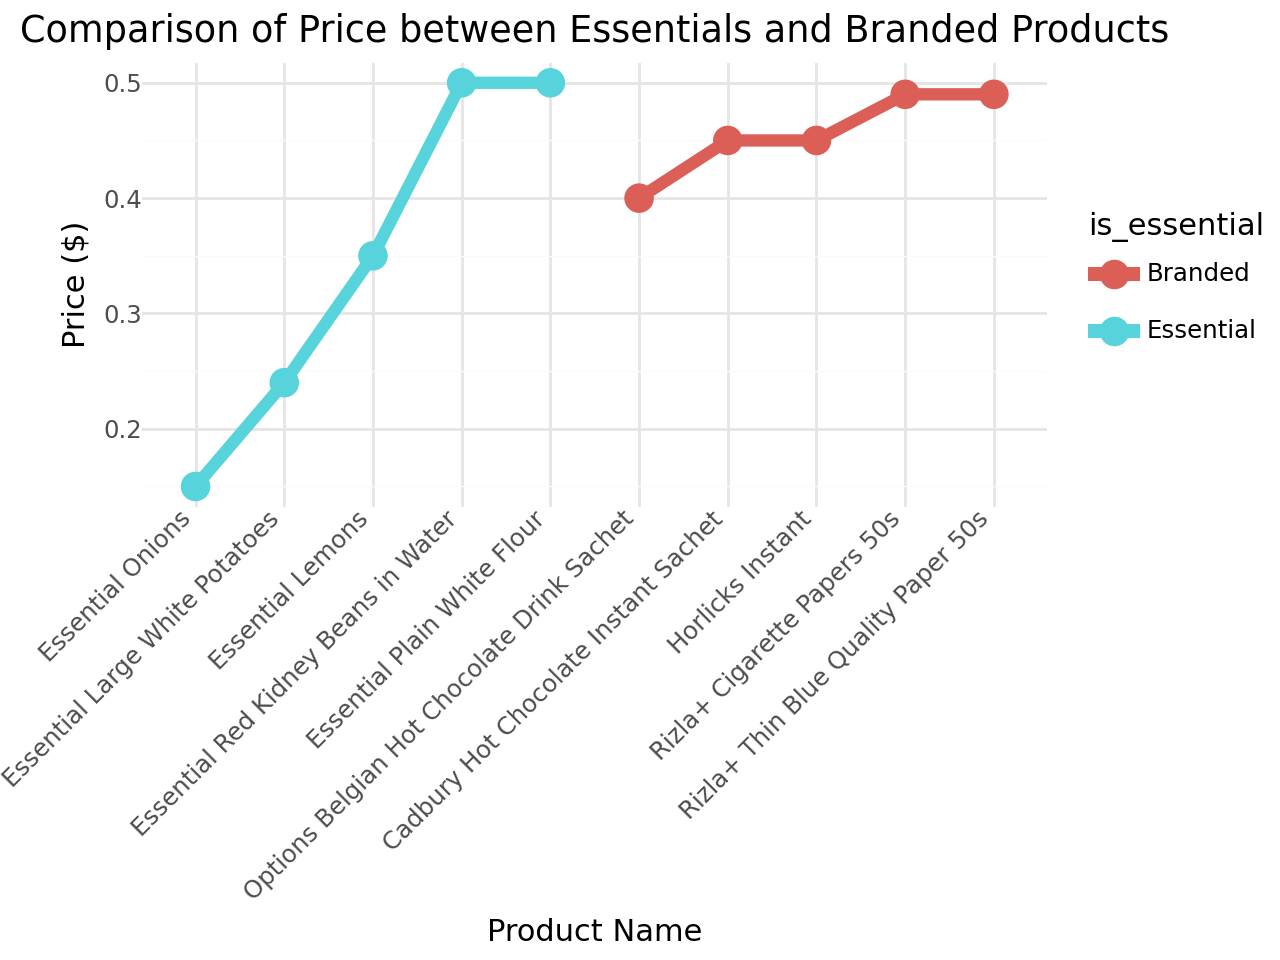

In [144]:
plot

---

In [145]:
plot = (ggplot(data=plot_df) +
        geom_boxplot(aes(x='is_essential', y='item-price', fill='is_essential'), alpha=0.5, outlier_color='red', outlier_size=3) +  
        geom_violin(aes(x='is_essential', y='item-price', fill='is_essential'), alpha=0.3) + 
        ggtitle('Price Distribution between Essentials and Branded Products') +
        xlab('Product Type') + 
        ylab('Price ($)') +
        theme_minimal() +
        theme(
            axis_text_x=element_text(angle=45, hjust=1), 
            legend_position='none', 
            axis_title=element_text(size=12, face='bold'),  
            plot_title=element_text(size=14, face='bold') 
        ) +
        scale_y_continuous(breaks=[0.10, 0.20, 0.30, 0.40, 0.50])  
)





<h1 style="color: purple; font-family: Arial, sans-serif; font-size: 36px; text-align: center; text-decoration: underline;">
   COMPARATIVE ANALYSIS: visualizations plot
</h1>




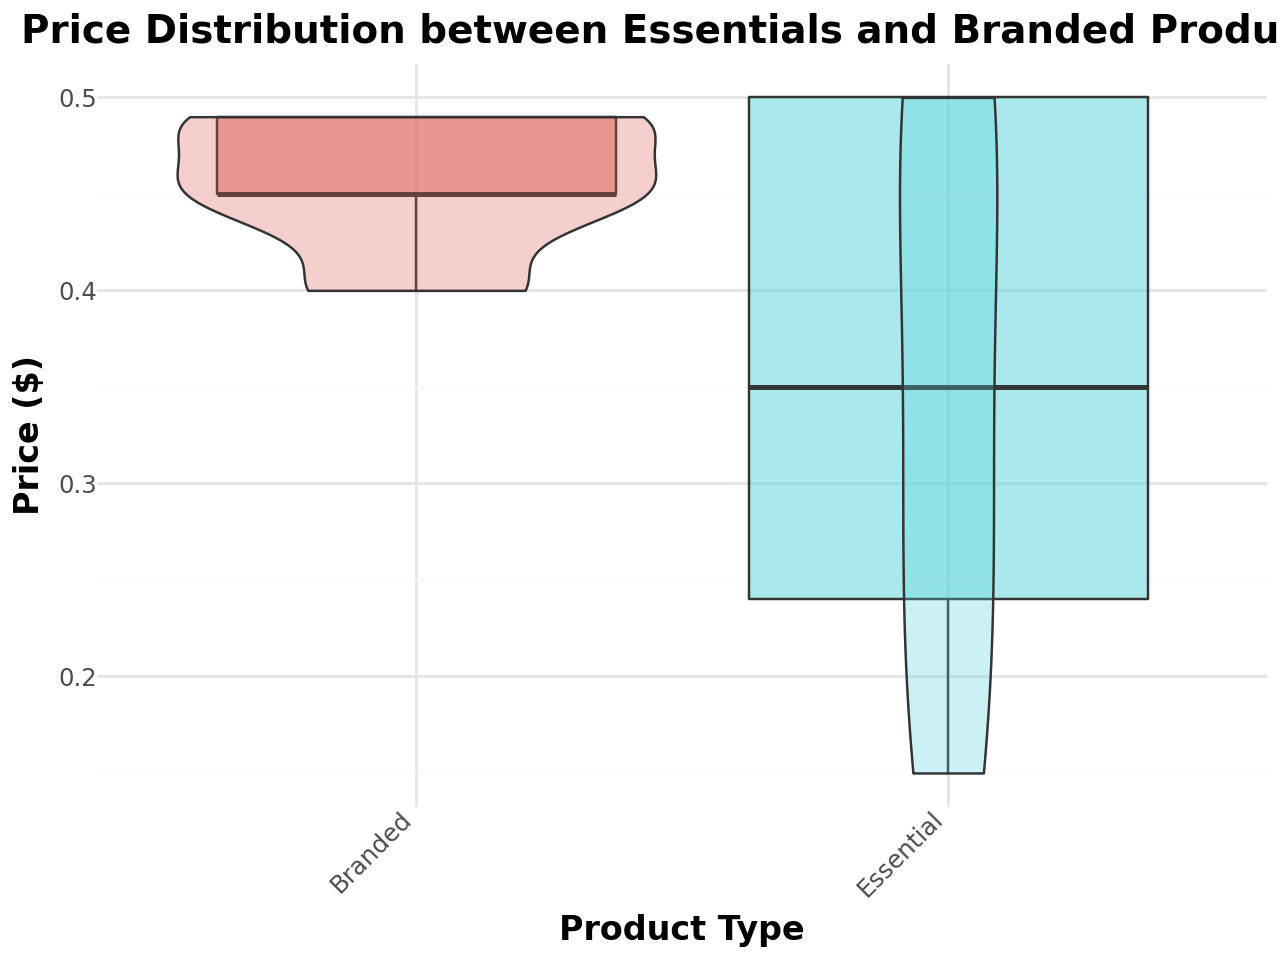

In [146]:
plot

---